# HPSI Training Day 3 Logistic Regression

In [166]:
import pandas as pd
import scipy as sc
import statsmodels.formula.api as sm
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


**Main idea:** Given the predictor variable  X, we model the *probability* that $Y = 1$ by 
$$
p(X) = p(Y = 1 | \ X) = \frac{e^{\beta_0 + \beta_1 X}}{1+ e^{\beta_0 + \beta_1 X}}
$$

The function on the right hand side can be written $\textrm{logistic}(\beta_0 + \beta_1 X)$ where the *logistic function* or *sigmoid function*,  
$$
\textrm{logistic}(x) := \frac{e^x}{1 + e^x} = \frac{1}{1+ e^{-x}}. 
$$
We can write the model succinctly as 
$$
p(X) = \textrm{logistic}( \beta_0 + \beta_1 X ).  
$$

One can check that the model is equivlant to 
$$
\log \left( \frac{p(X)}{1-p(X)} \right) = \beta_0 + \beta_1 X. 
$$

Sometimes, the function on the left hand side of is called the *logit function*, 
$$
\textrm{logit}(p) := \log \left( \frac{p}{1-p} \right). 
$$

We can equivalently write the model as 

$$
\textrm{logit} ( p(X) ) = \beta_0 + \beta_1 X.  
$$


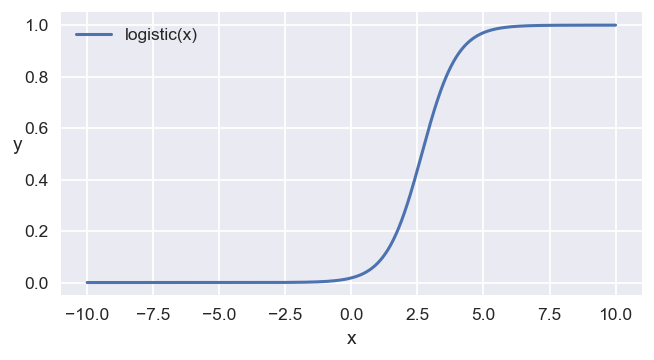

In [215]:
#plot the sigmoid/logistic functions
beta_0 = -4
beta_1 = 1.5

x = np.linspace(-10,10,1000)
y = 1/(1+np.exp(-(beta_0 + beta_1*x)))

plt.figure(figsize=(6,3),dpi=125)
plt.plot(x,y,label='logistic(x)')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y',rotation=0)

Changing the $\beta_0$ value shifts the curve **horizontally**, whereas changing the $\beta_1$ value changes the **slope** of the curve.

# Example 1
### Determine how many hours you need to study to pass the exam? 

This example was taken from [wikipedia](https://en.wikipedia.org/wiki/Logistic_regression). 

In [212]:
hours = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
         2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50] 
pass_Exam = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]
df = pd.DataFrame({"study_hours": hours, "pass_exam": pass_Exam})
df

,pass_exam,study_hours
0,0,0.50
1,0,0.75
2,0,1.00
3,0,1.25
4,0,1.50
5,0,1.75
6,1,1.75
7,0,2.00
8,1,2.25
9,0,2.50


(-1, 7)

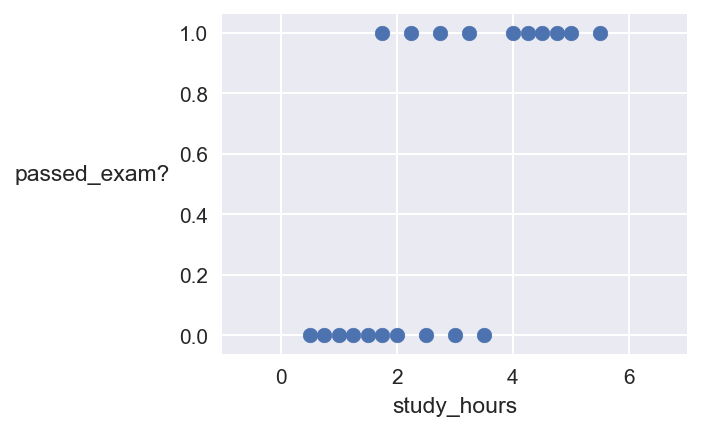

In [213]:
plt.figure(figsize=(4,3),dpi=150)
plt.scatter(df.study_hours,df.pass_exam)
plt.xlabel('study_hours')
plt.ylabel('passed_exam?',rotation=0,horizontalalignment='right')
plt.xlim(-1,7)

For this example, we want to find coefficients $\beta_0$ and $\beta_1$ so that this model best explains the data. 

$$
p(X) = \textrm{probability}(\textrm{passing}  | \ \textrm{X hours studying} ) = \textrm{logistic}( \beta_0 + \beta_1 X )
$$



In [214]:
logreg = sm.logit(formula="pass_exam ~ study_hours", data=df)
model_result = logreg.fit()
print(model_result.summary())

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              pass_exam   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Wed, 07 Mar 2018   Pseudo R-squ.:                  0.4208
Time:                        09:32:11   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
                                        LLR p-value:                 0.0006365
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.0777      1.761     -2.316      0.021      -7.529      -0.626
study_hours     1.5046    

In [190]:
model_result.params

Intercept     -4.077713
study_hours    1.504645
dtype: float64

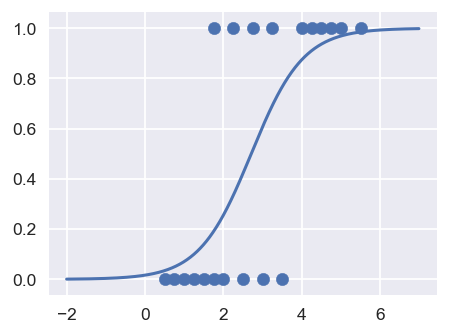

In [216]:
def sigmoid(x):
    return(1/(1+np.exp(-x)))

x=np.arange(-2,7,.01)

plt.figure(figsize=(4,3),dpi=125)
plt.scatter(df.study_hours,df.pass_exam,s=50)
plt.plot(x,sigmoid(model_result.params.Intercept + model_result.params.study_hours*x))

The plot shows hours vs. whether or not the student passed and the logistic regression curve. The curve predicts the probability that a student will pass, given how many hours they've studied. 

From the plot, we can see that the more hours you spend studying, the more likely you are to pass the exam. 

(...obviously)

If I study just 1.4 hours, what is the likelihood that I'll pass? 

In [217]:
sigmoid(model_result.params.Intercept + model_result.params.study_hours*1.4)

0.12225899837582443

**After studying just 1.4 hours, I'm only $12.2\%$ likely to pass.**

How many hours do you have to study in order for the probability of passing to be greater than $50\%$?

From the plot, it looks like $\approx 2.75$ hours. How can we find this number from the logistic regression? 


**Remember the Main Idea:** Given the predictor variable  X, we model the *probability* that $Y = 1$ by 
$$
p(X) = p(Y = 1 | \ X) = \frac{e^{\beta_0 + \beta_1 X}}{1+ e^{\beta_0 + \beta_1 X}}
$$

The function on the right hand side can be written $\textrm{logistic}(\beta_0 + \beta_1 X)$ where the *logistic function* or *sigmoid function*,  
$$
\textrm{logistic}(x) := \frac{e^x}{1 + e^x} = \frac{1}{1+ e^{-x}}. 
$$
We can write the model succinctly as 
$$
p(X) = \textrm{logistic}( \beta_0 + \beta_1 X ).  
$$

One can check that the model is equivlant to 
$$
\log \left( \frac{p(X)}{1-p(X)} \right) = \beta_0 + \beta_1 X. 
$$

Sometimes, the function on the left hand side of is called the *logit function*, 
$$
\textrm{logit}(p) := \log \left( \frac{p}{1-p} \right). 
$$

We can equivalently write the model as 

$$
\textrm{logit} ( p(X) ) = \beta_0 + \beta_1 X.  
$$

Now, we want to solve this equation by plugging in 0.5 (the threshold for passing) for P, and use our learned coefficients
$$
\beta_0 = -4.077 
\beta_1 = 1.5046
$$


In [218]:
prob_passing = 0.5

def logit(p):
    return np.log(p) - np.log(1 - p)

print((logit(prob_passing) - model_result.params.Intercept)/model_result.params.study_hours)

2.71008262425


**So we conclude that we need to study at least 2.71 hours to pass the exam**

In [219]:
# we can also use sklearn's LogisticRegression estimator
from sklearn.linear_model import LogisticRegression

# There is no way (that I know of) to switch off regularization in scikit-learn, 
# but you can make it ineffective by setting the tuning parameter C to a large number.
logreg = LogisticRegression(C=1e9)
logreg.fit(df.study_hours.values.reshape(-1,1),df.pass_exam.values)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

We can get the same coefficients that we saw above (notice the trailing underscores indicating that they are "learned" parameters)

In [220]:
logreg.coef_

array([[ 1.5046454]])

In [221]:
logreg.intercept_

array([-4.07771335])

We can also simply call `logreg.predict()` to make predictions, here we use 1.4 hours to show that we get the same result

In [222]:
logreg.predict(1.4)

array([0])

We can likewise call `logreg.predict_proba()` to return the predicted probabilities for each class (passing/failing)

In [223]:
logreg.predict_proba(1.4)

array([[ 0.877741,  0.122259]])